In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Let a system be in a form
## $\dot{x} = f(x)+g(x)u$ 

### $H= I_1 w_1+I_2 w_2+\dfrac{1}{30}\left[I_1^3+\dfrac{1}{2}I_2^3\right]+\varepsilon\cos(\theta_2-\theta_1)=H_0(I)+\varepsilon V(\theta)$
### the Hamiltonian equations give:
#### $\dot{I} = -\nabla_{\theta}H$
#### $\dot{\theta} = \nabla_{I}H$


In [87]:
class Model:
    def __init__(self, x_0):
        """x = [I1, I2, theta1, theta2]"""
        self.x_0 = x_0
        self.t = np.linspace(0, 100, 1001)
        self.w1 = 10
        self.w2 = 15
        
        self.iter_ = 0
        self.evolution = np.array([x_0])
    
    def f(self, x):
        f = [0,
             0,
             self.w1 + x[0]**(2)/10,
             self.w2 + x[1]**(2)/20]
        return np.array(f)
    
    def g(self, x):
        g = [-np.sin(x[3]-x[2]),
              np.sin(x[3]-x[2]),
              0,
              0]
        return np.array(g)
    
    def equation(self, x, t, u):
#         print((self.f(x) + self.g(x)*u)[[2, 3]])
        return self.f(x) + self.g(x)*u
        
    def update(self, u):
        x_0 = self.evolution[-1]
        span = np.linspace(self.t[self.iter_], self.t[self.iter_+1], 101)
        
        sol = odeint(func=self.equation, y0=x_0, t=span, args=(u,))
        
        self.evolution = np.vstack([self.evolution, sol[1:]])
        self.iter_ += 1
        

In [95]:
m = Model(np.array([5, 2, 0, 0]))

In [96]:
for i in range(300):
    m.update(0.1)
    
for i in range(300):
    m.update(0.01)

In [97]:
X = m.evolution

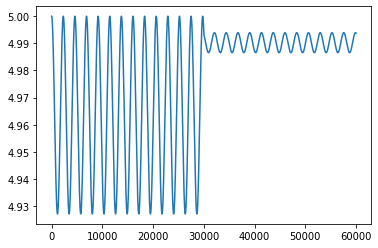

In [98]:
plt.plot(X[:,0])

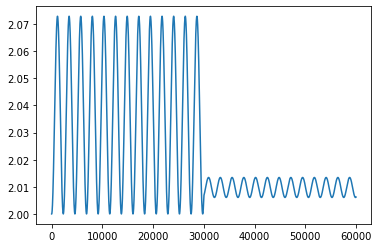

In [99]:
plt.plot(X[:,1])

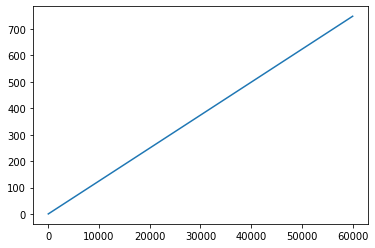

In [100]:
plt.plot(X[:,2])